# Quantum Computing Workshop: Introduction to Qiskit

In [3]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Basic NOT circuit

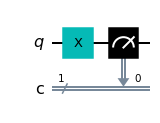

In [7]:
# Basic quantum circuit
circ = QuantumCircuit(1,1)
circ.x(0)
circ.measure(0,0)
circ.draw()

In [8]:
# Run basic circuit and measure
sim_backend = Aer.get_backend('aer_simulator')
job = sim_backend.run(circ, shots=2048)
result = job.result()
counts = result.get_counts()

counts

{'1': 2048}

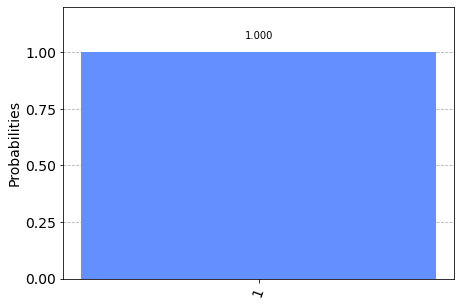

In [4]:
# Plot histogram of results
plot_histogram(counts)

# CNOT circuit

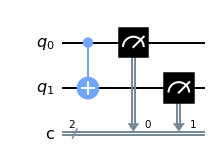

In [5]:
# Create CNOT circuit
cnot_circ = QuantumCircuit(2,2)

# Comment out the next line to see what happens when the input is left as |0>
#cnot_circ.x(0)

# Comment out the next line to see what happens when the target is left as |0>
#cnot_circ.x(1)

# Apply CNOT, then measure
cnot_circ.cx(0,1)
cnot_circ.measure([0,1],[0,1])

cnot_circ.draw()

In [6]:
# Run CNOT circuit
job = sim_backend.run(cnot_circ)
counts = job.result().get_counts()
counts

{'00': 1024}

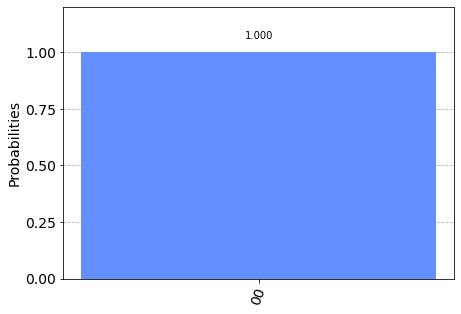

In [7]:
# Plot histogram of results
plot_histogram(counts)

# Superposition

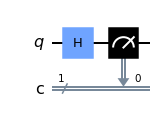

In [8]:
# Create superposition circuit
sp_circ = QuantumCircuit(1,1)
sp_circ.h(0)
sp_circ.measure(0,0)
sp_circ.draw()

In [9]:
# Run simulation and plot results
job = sim_backend.run(sp_circ)
sp_counts = job.result().get_counts()
sp_counts

{'1': 522, '0': 502}

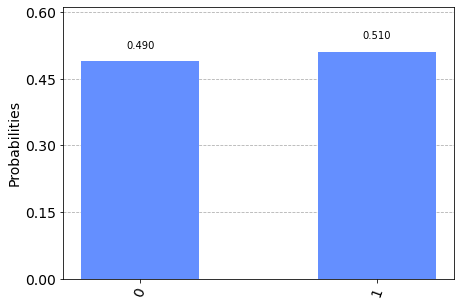

In [10]:
# Plot
plot_histogram(sp_counts)

### Multiple qubits in superposition

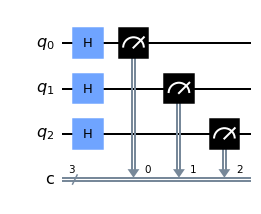

In [14]:
# Create superposition circuit
sp_circ2 = QuantumCircuit(3,3)
sp_circ2.h([0,1,2])
sp_circ2.measure([0,1,2],[0,1,2])
sp_circ2.draw()

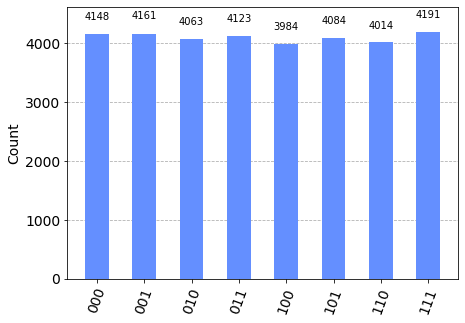

In [15]:
# Run simulation and plot results
# Try increasing the number of shots to see how that affects the result
job = sim_backend.run(sp_circ2, shots=4*8192)
sp_counts = job.result().get_counts()
plot_histogram(sp_counts)

# Bell state (entanglement)

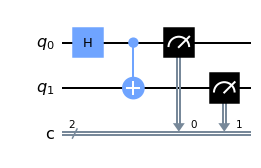

In [16]:
# Create Bell state circuit
bell_circ = QuantumCircuit(2,2)
bell_circ.h(0)
bell_circ.cx(0, 1)
bell_circ.measure([0,1], [0,1])
bell_circ.draw()

In [17]:
job = sim_backend.run(bell_circ)
bell_counts = job.result().get_counts()
bell_counts

{'00': 479, '11': 545}

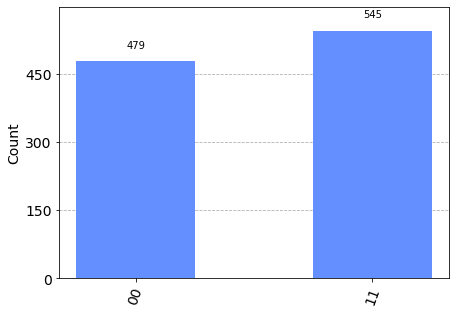

In [18]:
plot_histogram(bell_counts)

# Running on a real quantum computer

In [20]:
# Get backend
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [21]:
# Find the least busy system that has at least 2 qubits...
from qiskit.providers.ibmq import least_busy

ibmq_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                   not x.configuration().simulator and x.status().operational==True))

print(ibmq_backend)

ibmq_quito


In [27]:
# ...Or simply select a specific backend
ibmq_backend = provider.backend.ibm_oslo
ibmq_backend

<IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
# Run the circuit
job_ibmq = ibmq_backend.run(bell_circ, shots=1024)

In [24]:
# Get the results (NOTE: this will error out since we did not transpile first!)
result = job_ibmq.result()

Traceback (most recent call last):
  Input In [24] in <cell line: 2>
    result = job_ibmq.result()
  File /opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:290 in result
    raise IBMQJobFailureError(
IBMQJobFailureError: "Unable to retrieve result for job 636d0220b5440234f6cb7bd0. Job has failed: The Qobj uses gates (['h']) that are not among the basis gates (['id', 'rz', 'sx', 'x', 'cx', 'reset']). Error code: 1106."

Use %tb to get the full traceback.


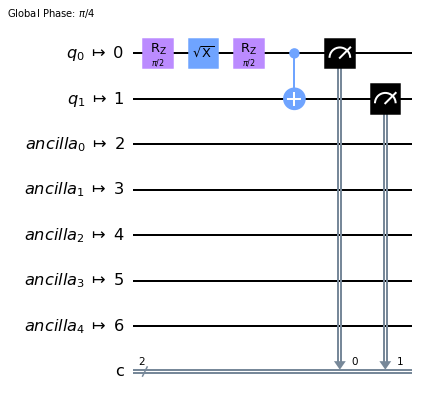

In [28]:
# Transpile the circuit first, the attempt to run again!
from qiskit import transpile

bell_circ_tp = transpile(bell_circ, ibmq_backend)
bell_circ_tp.draw()

In [21]:
# Run the circuit
job_ibmq = ibmq_backend.run(bell_circ_tp, shots=1024)

# OR...

In [29]:
# ... Just use the execute() method instead!
# The execute() method will transpile the circuit for you
from qiskit import execute

job_ibmq = execute(bell_circ, ibmq_backend, shots=1024)

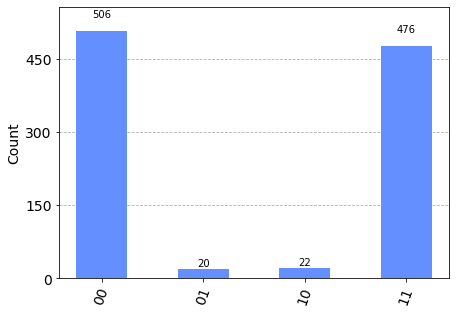

In [47]:
# Plot histogram of results. Note the noise in the system
# results in states that should not appear in the measurements.
result = job_ibmq.result()
counts = result.get_counts()
plot_histogram(counts)

## Challenge: Create other Bell states
Create the following state

### $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

In [ ]:
# FILL IN ANSWER HERE


# Statevector simulator

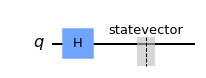

In [10]:
# Create superposition circuit again
sp_circ3 = QuantumCircuit(1)
sp_circ3.h(0)
sp_circ3.save_statevector()
sp_circ3.draw()

In [11]:
# Get the statevector simulator backend
svsim_backend = Aer.get_backend("aer_simulator_statevector")

In [12]:
# Run in statevector simulator and get the state vector
job = svsim_backend.run(sp_circ3)
result = job.result()
state = result.get_statevector(sp_circ3)
state

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


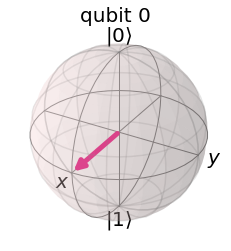

In [13]:
# Plot Bloch Sphere
plot_bloch_multivector(state)

### Z gate

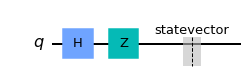

In [14]:
# Place a qubit into a superposition state
# then apply the Z gate
z_circ = QuantumCircuit(1)
z_circ.h(0)
z_circ.z(0)
z_circ.save_statevector()
z_circ.draw()

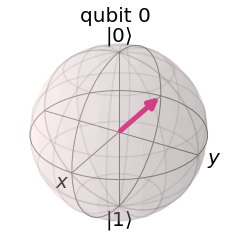

In [15]:
# Run in the statevector simulator and plot out the Bloch sphere
# representation of the state. 
job = svsim_backend.run(z_circ)
result = job.result()
state = result.get_statevector(z_circ)
plot_bloch_multivector(state)

### Rz gate

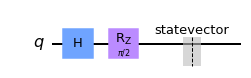

In [16]:
# The Rz gate rotates the state of the qubit around
# the Z-axis of the Bloch sphere by a given angle.
rz_circ = QuantumCircuit(1)
rz_circ.h(0)
rz_circ.rz(np.pi/2, 0)
rz_circ.save_statevector()
rz_circ.draw()

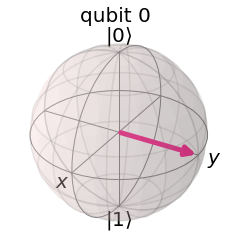

In [17]:
# Run the Rz circuit in the simulator.
job = svsim_backend.run(rz_circ)
result = job.result()
state = result.get_statevector(rz_circ)
plot_bloch_multivector(state)

### Visualizing multi-qubit states

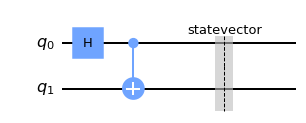

In [20]:
# Create Bell state circuit
bell_circ2 = QuantumCircuit(2)
bell_circ2.h(0)
bell_circ2.cx(0, 1)
bell_circ2.save_statevector()
bell_circ2.draw()

In [21]:
# Get the statevector simulator backend
svsim_backend = Aer.get_backend("aer_simulator_statevector")

In [22]:
# Run in statevector simulator and get the state
job = svsim_backend.run(bell_circ2)
result = job.result()
state = result.get_statevector(bell_circ2)
state

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


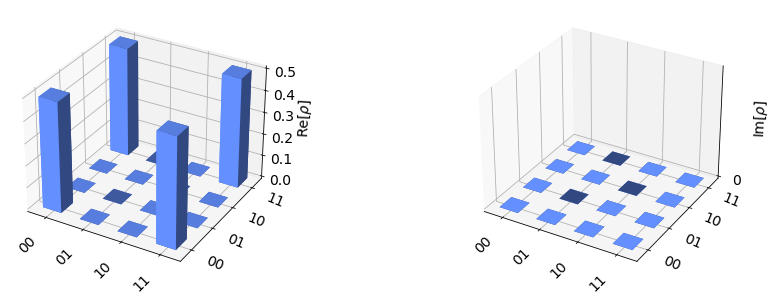

In [23]:
# Plot the statevector "city" plot
plot_state_city(state)

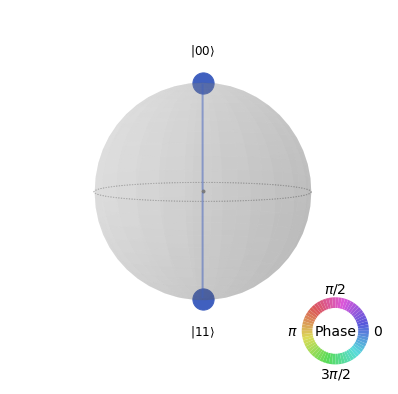

In [24]:
# Plot the state on the Qsphere
plot_state_qsphere(state)

## GHZ Circuit

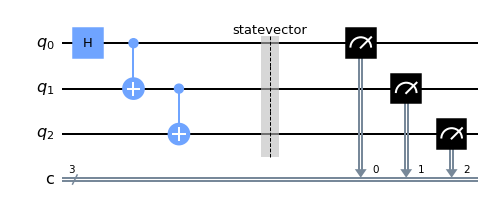

In [25]:
# Create 3-qubit GHZ state circuit
ghz_circ = QuantumCircuit(3, 3)
ghz_circ.h(0)
ghz_circ.cx(0, 1)
ghz_circ.cx(1, 2)
ghz_circ.save_statevector()
ghz_circ.measure([0,1,2], [0,1,2])
ghz_circ.draw()

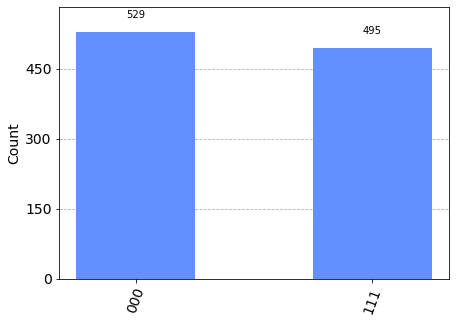

In [26]:
# Run in simulator and plot out the measured result
job = sim_backend.run(ghz_circ)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

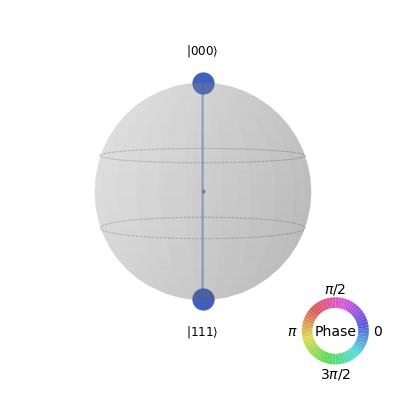

In [27]:
# Plot the QSphere
state = result.get_statevector(ghz_circ)
plot_state_qsphere(state)

### Larger GHZ circuit

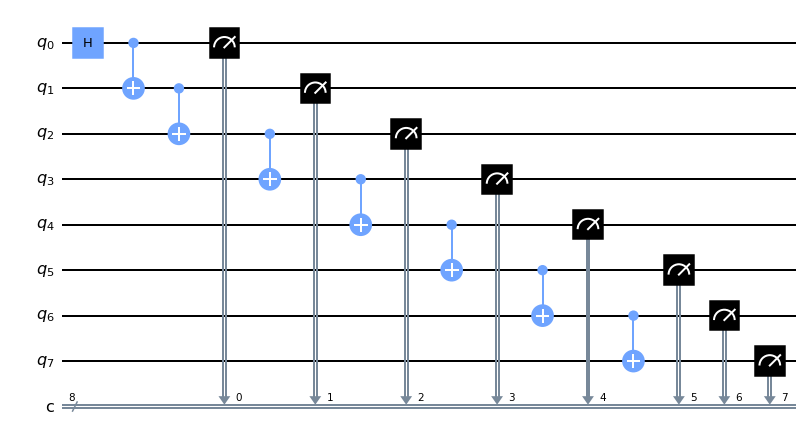

In [33]:
n_qubits = 8

big_ghz = QuantumCircuit(n_qubits, n_qubits)
big_ghz.h(0)
for i in range(n_qubits-1):
    big_ghz.cx(i, i+1)
big_ghz.measure(range(n_qubits), range(n_qubits))
big_ghz.draw()

In [34]:
# Circuit depth
big_ghz.depth()

9

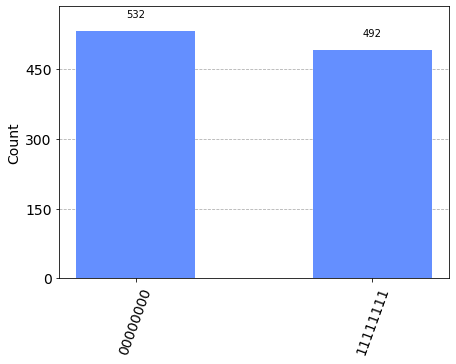

In [36]:
# Run in simulator and plot out the measured result
job = sim_backend.run(big_ghz)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Challenge: make a shorter depth GHZ circuit

In [ ]:
### INSERT ANSWER HERE ###


